# **SIBER-RISK Strong Motion Database - Python example**

In this Jupyter notebook we will explore the data structure for the *.npz* files of the SIBER-RISK's database using Python.

In [1]:
import numpy as np
import scipy.integrate as spin
import matplotlib.pyplot as plt

## **1. Dataset: 20240629_5.0M_23.97S_70.25W_44.0KM**

The *event_id* is composed by the date of the event (*2029-06-29*), its magnitude (*5.0*), hypocenter latitude (*-23.97*), hypocenter longitude (*-70.25*) and depth (*44.0*).

In [2]:
filename = '20240629_5.0M_23.97S_70.25W_44.0KM.npz'
with np.load(filename, allow_pickle=True) as f:
    data = {}
    for key, value in f.items():
        data[key] = value.item()

You can recover the *event_id* directly in Python:

In [3]:
print('Event ID:', data.get('event_id'))

Event ID: 20240629_5.0M_23.97S_70.25W_44.0KM


### **1.1 License of use**

In [4]:
print(data.get('licensing'))

This SIBER-RISK Strong Motion Database is made available under the Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International Public License: https://creativecommons.org/licenses/by-nc-sa/4.0/legalcode. Any rights in individual contents of the database are licensed under the Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International Public License: https://creativecommons.org/licenses/by-nc-sa/4.0/legalcode


### **1.2 How to cite this database**

In [5]:
print(data.get('cite'))

Sebastián Castro, Roberto Benavente, Jorge G. F. Crempien, Gabriel Candia, Juan Carlos de la Llera; A Consistently Processed Strong‐Motion Database for Chilean Earthquakes. Seismological Research Letters 2022;; 93 (5): 2700–2718. doi: https://doi.org/10.1785/0220200336


### **1.3 Database url**

In [6]:
print(data.get('databaseURL'))

https://doi.org/10.7764/datasetUC/ING-UC.1170836_1


## **2. Stations**

All the station keys start with the prefix *st* followed by a zero padded number from *0* to *n-1*, being *n* the total number of stations recorded.

In [7]:
n = len(data) - 4 # We do not consider keys for event_id, licensing, cite and databaseURL
print('Total stations:', n)

Total stations: 2


### **2.1 Data structure**

Each station is a dictionary with the following keys

#### **2.1.1 Event properties**

| Key | Description |
| -- | -- |
| magnitude | Reported event magnitude |
| hypocenter_lon | Hyponcenter longitude in decimals |
| hypocenter_lat | Hypocenter latitude in decimals |
| depth | Hypocenter depth in kilometers |
| event_type | Event type (interface, intraslab, crustal or undetermined) |

#### **2.1.2 Station properties**

| Key | Description |
| -- | -- |
| station_name | Station name or *Unknown* |
| station_code | Station code |
| station_lon | Station longitude in decimals |
| station_lat | Station latitude in decimals |
| vs30 | Station Vs30 in m/s |
| azimuth | Station azimuth in degrees |
| Rhypo | Hypocentral distance in kilometers |
| Repi | Epicentral distance in kilometers |
| Rrup | Rupture distance in kilometers | 
| Rjb | Joyner-Boore distance in kilometers |

#### **2.1.3 Record properties**

Each station has three channels (1, 2 and 3), with channel 3 being the vertical one. Replace the suffix *i* with your channel of interest.

| Key | Description |
| -- | -- |
| starttime | Start date and time of the records in format *YYYY-MM-DDThh:mm:ss.msZ* |
| dt | Temporal discretization in seconds |
| p_wave | Position of the P-Wave arrival |
| component_*i* | Name of the component *i* |
| corner_freqs_*i* | Corner frequencies used in the filtered acceleration for component *i* |
| acc_uncorrected_*i* | Uncorrected acceleration for component *i* |
| acc_corrected_*i* | Corrected acceleration for component *i* |
| acc_filtered_*i* | Filtered acceleration for component *i* |

#### **2.1.3 Miscellaneous**

| Key | Description |
| -- | -- |
| units | Units used in the event, station and record properties |
| last_update | Date and time of the last update |

### **2.2 Data visualization**

The following code shows how to compute and visualize the velocity and displacement for a filtered record.

In [8]:
# Choose the station and component of your interest
station   = data.get('st00')
component = 1

# Properties
dt     = station.get('dt')
p_wave = station.get('p_wave')
n      = len(station.get('acc_filtered_%i' %component))
t      = np.linspace(0., (n-1)*dt, n)
label  = station.get('component_%i' %component)

#### **Acceleration**

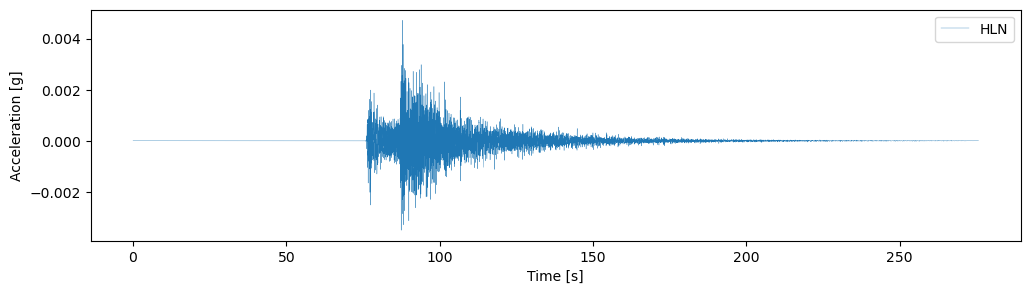

In [9]:
acc = station.get('acc_filtered_%i' %component)

fig = plt.figure(figsize=(12, 3))
ax  = fig.add_subplot(111)

ax.plot(t, acc/9.81, label=label, lw=0.25)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Acceleration [g]')
ax.legend()

#### **Velocity**

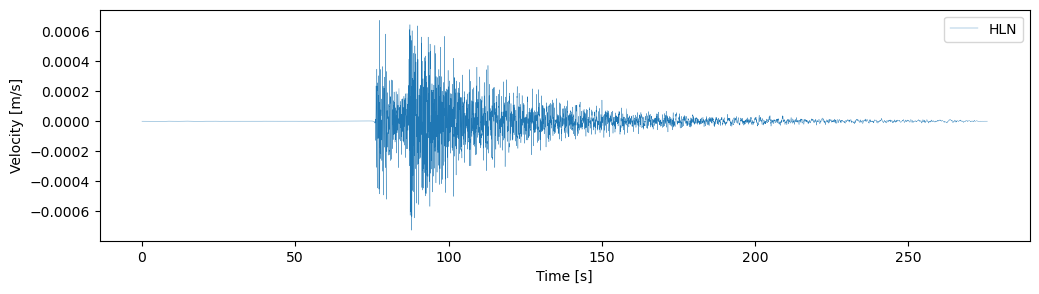

In [10]:
vel = spin.cumulative_trapezoid(acc, x=t, initial=0.)
if p_wave > 0:
    vel -= vel[:p_wave].mean()

fig = plt.figure(figsize=(12, 3))
ax  = fig.add_subplot(111)

ax.plot(t, vel, label=label, lw=0.25)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Velocity [m/s]')
ax.legend()

#### **Displacement**

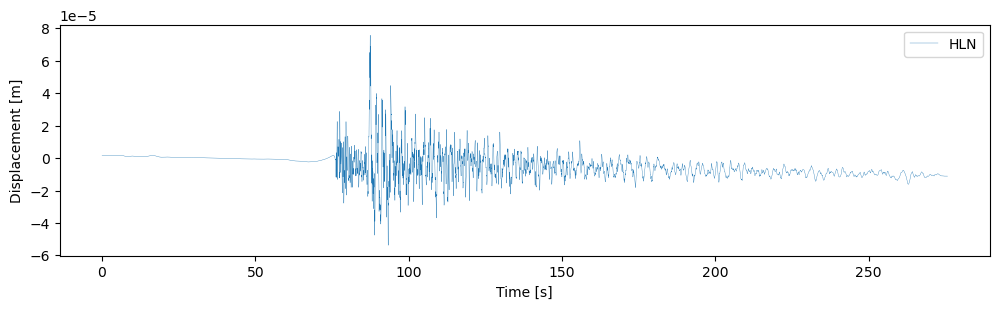

In [11]:
dis = spin.cumulative_trapezoid(vel, x=t, initial=0.)
if p_wave > 0:
    dis -= dis[:p_wave].mean()

fig = plt.figure(figsize=(12, 3))
ax  = fig.add_subplot(111)

ax.plot(t, dis, label=label, lw=0.25)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Displacement [m]')
ax.legend()